In [41]:
import tensorflow as tf
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img, image
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt
from keras.applications import vgg16
%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
X_train[0].shape

(28, 28)

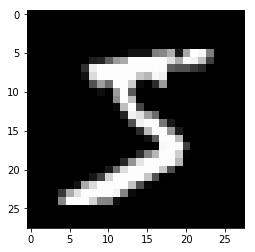

In [5]:
plt.imshow(X_train[0], cmap='gray')

In [6]:
y_train[0]

5

In [7]:
image_hight,image_width=28,28

In [8]:
X_train = X_train.reshape(60000,image_hight*image_width)
X_test = X_test.reshape(10000, image_hight*image_width)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [9]:
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [10]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
print(X_train[0])


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [11]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [12]:
y_train=to_categorical(y_train,10)
print(y_train.shape)
y_test=to_categorical(y_test,10)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [16]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 22s 374us/step - loss: 0.1805 - accuracy: 0.9445 - val_loss: 0.1131 - val_accuracy: 0.9631
Epoch 2/10
60000/60000 [==============================] - 23s 386us/step - loss: 0.0806 - accuracy: 0.9747 - val_loss: 0.0833 - val_accuracy: 0.9747
Epoch 3/10
60000/60000 [==============================] - 24s 395us/step - loss: 0.0551 - accuracy: 0.9828 - val_loss: 0.0856 - val_accuracy: 0.9731
Epoch 4/10
60000/60000 [==============================] - 24s 405us/step - loss: 0.0409 - accuracy: 0.9866 - val_loss: 0.0837 - val_accuracy: 0.9772
Epoch 5/10
60000/60000 [==============================] - 24s 401us/step - loss: 0.0357 - accuracy: 0.9886 - val_loss: 0.0818 - val_accuracy: 0.9778
Epoch 6/10
60000/60000 [==============================] - 25s 424us/step - loss: 0.0291 - accuracy: 0.9905 - val_loss: 0.0778 - val_accuracy: 0.9793
Epoch 7/10
60000/60000 [==============================]

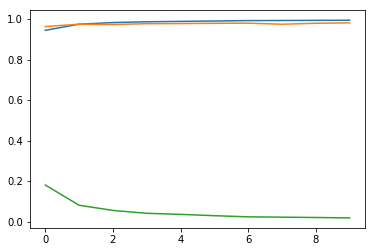

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])

In [21]:
cnn = Sequential()

In [25]:
cnn.add(Conv2D(32, (5,5), input_shape=(28,28,1), padding='same', activation='relu'))

In [28]:
cnn.add(MaxPooling2D())

In [31]:
cnn.add(Conv2D(64, (5,5), padding='same', activation='relu'))

In [32]:
cnn.add(MaxPooling2D())

In [33]:
cnn.add(Flatten())

In [35]:
cnn.add(Dense(1024, activation='relu'))

In [37]:
cnn.add(Dense(10, activation='softmax'))

In [39]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
print(cnn.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              3212288   
_________________________________________________________________
dense_6 (Dense)              (None, 10)               